<a href="https://colab.research.google.com/github/rishisg/ChatGPT/blob/main/Car_Price_Prediction_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
#Car Price Prediction Dataset
#Source: https://www.kaggle.com/datasets/hellbuoy/car-price-prediction
#Objective: Examine car pricing factors such as brand, mileage, and year of manufacture.

#1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor

In [31]:
#2. Load the Dataset
# Load the dataset
data = pd.read_csv("car_price_prediction.csv")

# Display first 5 rows
print(data.head())

# Display column names
print("\nColumn names in the dataset:")
print(data.columns)

# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())

         ID  Price  Levy Manufacturer    Model  Prod. year   Category  \
0  45654403  13328  1399        LEXUS   RX 450        2010       Jeep   
1  44731507  16621  1018    CHEVROLET  Equinox        2011       Jeep   
2  45774419   8467     -        HONDA      FIT        2006  Hatchback   
3  45769185   3607   862         FORD   Escape        2011       Jeep   
4  45809263  11726   446        HONDA      FIT        2014  Hatchback   

  Leather interior Fuel type Engine volume    Mileage  Cylinders  \
0              Yes    Hybrid           3.5  186005 km        6.0   
1               No    Petrol             3  192000 km        6.0   
2               No    Petrol           1.3  200000 km        4.0   
3              Yes    Hybrid           2.5  168966 km        4.0   
4              Yes    Petrol           1.3   91901 km        4.0   

  Gear box type Drive wheels   Doors             Wheel   Color  Airbags  
0     Automatic          4x4  04-May        Left wheel  Silver       12  
1   

In [32]:
#3. Data Cleaning
#Handle missing values and ensure consistent data types.

# Fill missing values with mean (for numerical) or mode (for categorical)
for column in data.columns:
    if data[column].dtype == 'object':  # Categorical columns
        data[column] = data[column].fillna(data[column].mode()[0])
    else:  # Numerical columns
        data[column] = data[column].fillna(data[column].mean())

# Verify missing values are handled
print("\nMissing values after handling:")
print(data.isnull().sum())


Missing values after handling:
ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64


In [33]:
#4. Encode Categorical Variables
#Convert categorical variables into numeric form using one-hot encoding or label encoding.

# Perform one-hot encoding for categorical variables
categorical_columns = ['Manufacturer', 'Fuel type', 'Gear box type']
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Apply label encoding to ordinal categorical columns (if any)
label_encoder = LabelEncoder()
if 'owner' in data_encoded.columns:
    data_encoded['owner'] = label_encoder.fit_transform(data_encoded['owner'])

# Display updated dataset
print("\nEncoded dataset:")
print(data_encoded.head())


Encoded dataset:
         ID  Price  Levy    Model  Prod. year   Category Leather interior  \
0  45654403  13328  1399   RX 450        2010       Jeep              Yes   
1  44731507  16621  1018  Equinox        2011       Jeep               No   
2  45774419   8467     -      FIT        2006  Hatchback               No   
3  45769185   3607   862   Escape        2011       Jeep              Yes   
4  45809263  11726   446      FIT        2014  Hatchback              Yes   

  Engine volume    Mileage  Cylinders  ... Manufacturer_სხვა Fuel type_Diesel  \
0           3.5  186005 km        6.0  ...             False            False   
1             3  192000 km        6.0  ...             False            False   
2           1.3  200000 km        4.0  ...             False            False   
3           2.5  168966 km        4.0  ...             False            False   
4           1.3   91901 km        4.0  ...             False            False   

  Fuel type_Hybrid Fuel type_Hyd

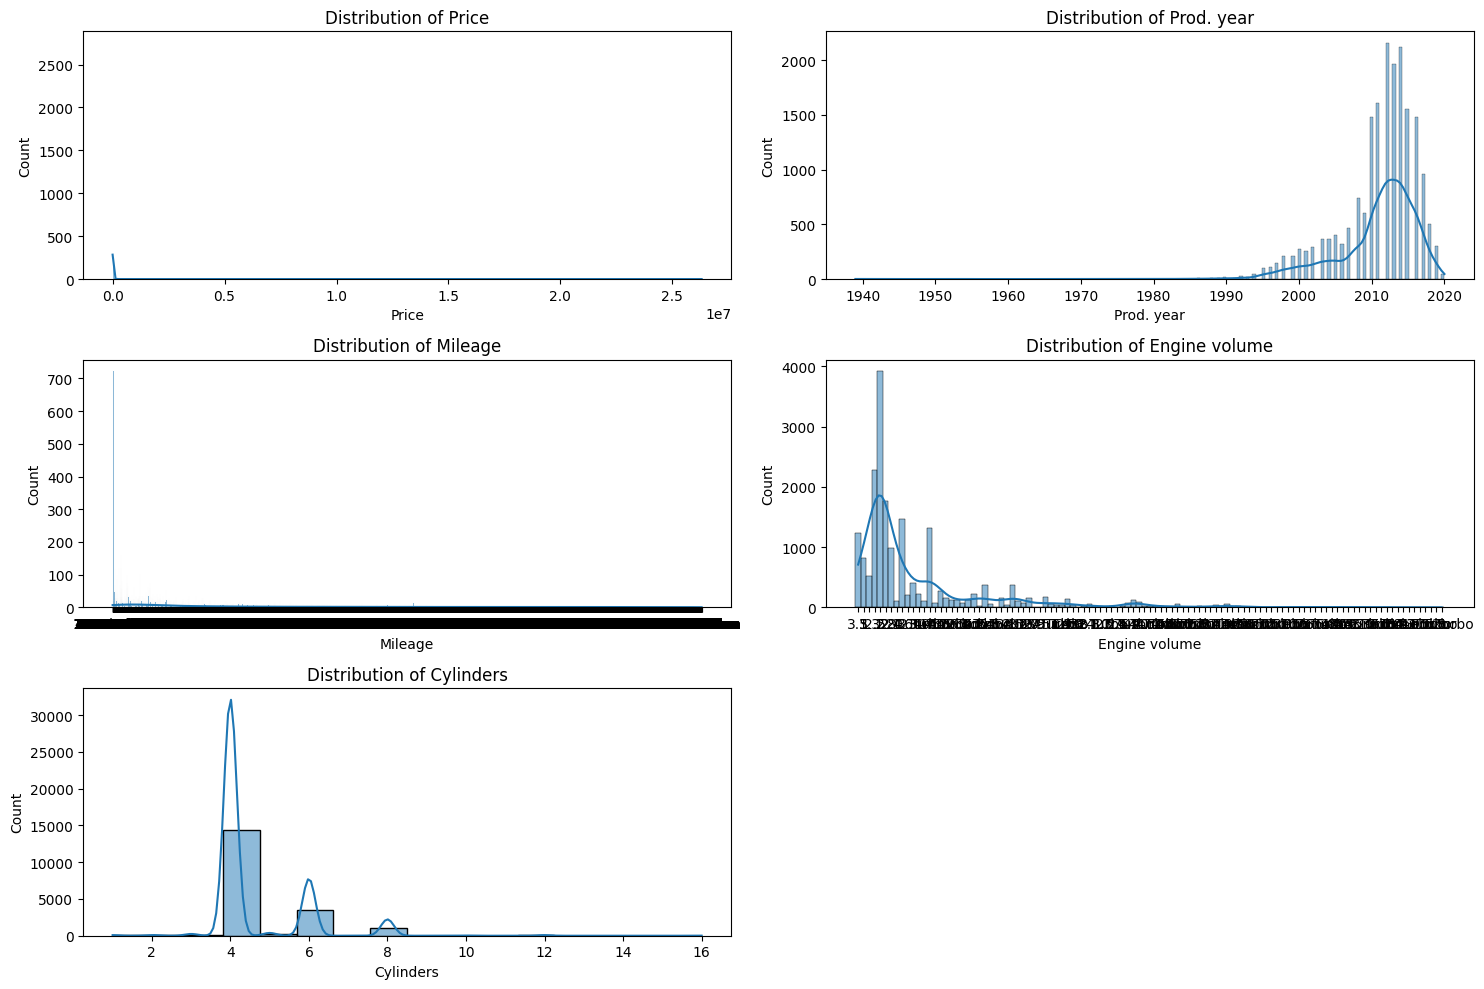

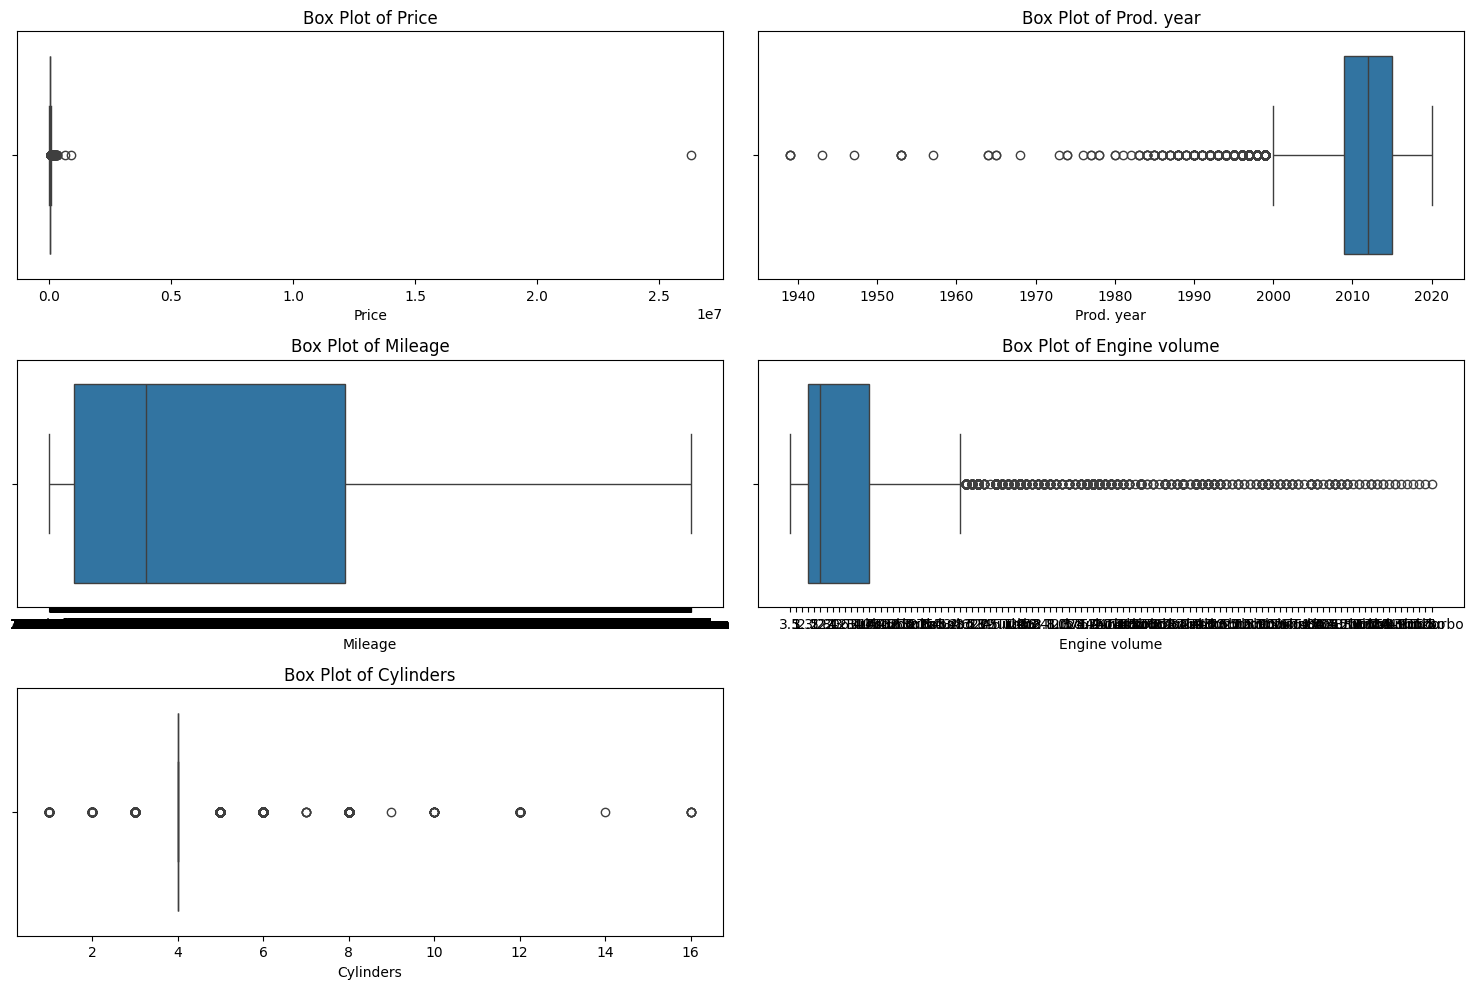

In [34]:
#5. Exploratory Data Analysis (EDA)
#Numerical Columns

# Histograms for numerical columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(['Price', 'Prod. year', 'Mileage', 'Engine volume', 'Cylinders']):
    plt.subplot(3, 2, i+1)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

# Box plots for numerical columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(['Price', 'Prod. year', 'Mileage', 'Engine volume', 'Cylinders']):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x=data[column])
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()

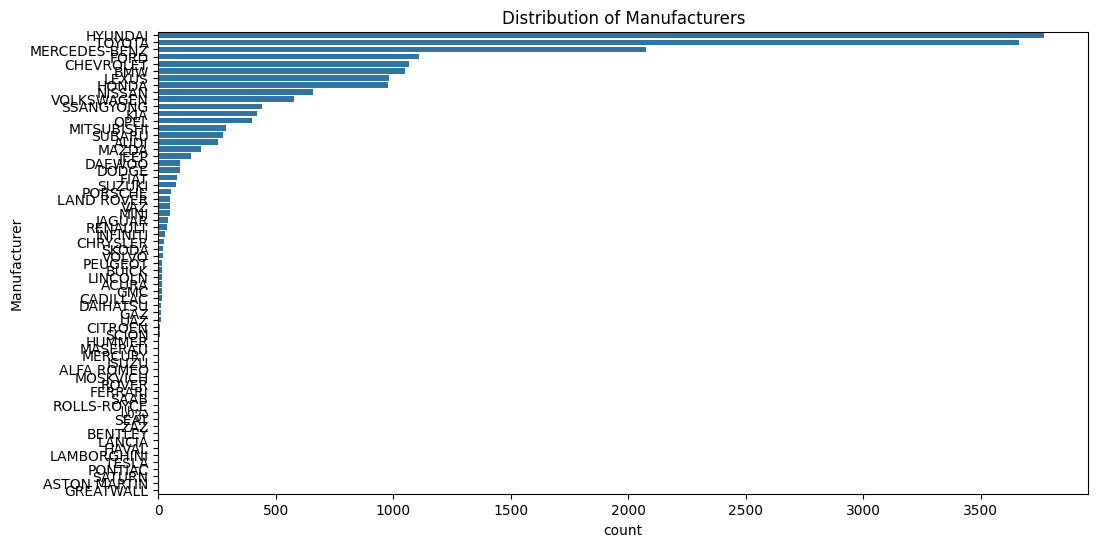

In [35]:
#Categorical Columns
# Bar plot for Manufacturer
plt.figure(figsize=(12, 6))
sns.countplot(y='Manufacturer', data=data, order=data['Manufacturer'].value_counts().index)
plt.title('Distribution of Manufacturers')
plt.show()

In [36]:
#6. Feature Engineering
#Create new features or transform existing ones if needed.

# Example: Create a feature for car age
current_year = 2023
data_encoded['Car_Age'] = current_year - data_encoded['Prod. year']

# Drop unnecessary columns (e.g., ID, if present)
if 'ID' in data_encoded.columns:
    data_encoded = data_encoded.drop('ID', axis=1)

         ID  Price  Levy Manufacturer    Model  Prod. year   Category  \
0  45654403  13328  1399        LEXUS   RX 450        2010       Jeep   
1  44731507  16621  1018    CHEVROLET  Equinox        2011       Jeep   
2  45774419   8467     -        HONDA      FIT        2006  Hatchback   
3  45769185   3607   862         FORD   Escape        2011       Jeep   
4  45809263  11726   446        HONDA      FIT        2014  Hatchback   

  Leather interior Fuel type Engine volume    Mileage  Cylinders  \
0              Yes    Hybrid           3.5  186005 km        6.0   
1               No    Petrol             3  192000 km        6.0   
2               No    Petrol           1.3  200000 km        4.0   
3              Yes    Hybrid           2.5  168966 km        4.0   
4              Yes    Petrol           1.3   91901 km        4.0   

  Gear box type Drive wheels   Doors             Wheel   Color  Airbags  
0     Automatic          4x4  04-May        Left wheel  Silver       12  
1   

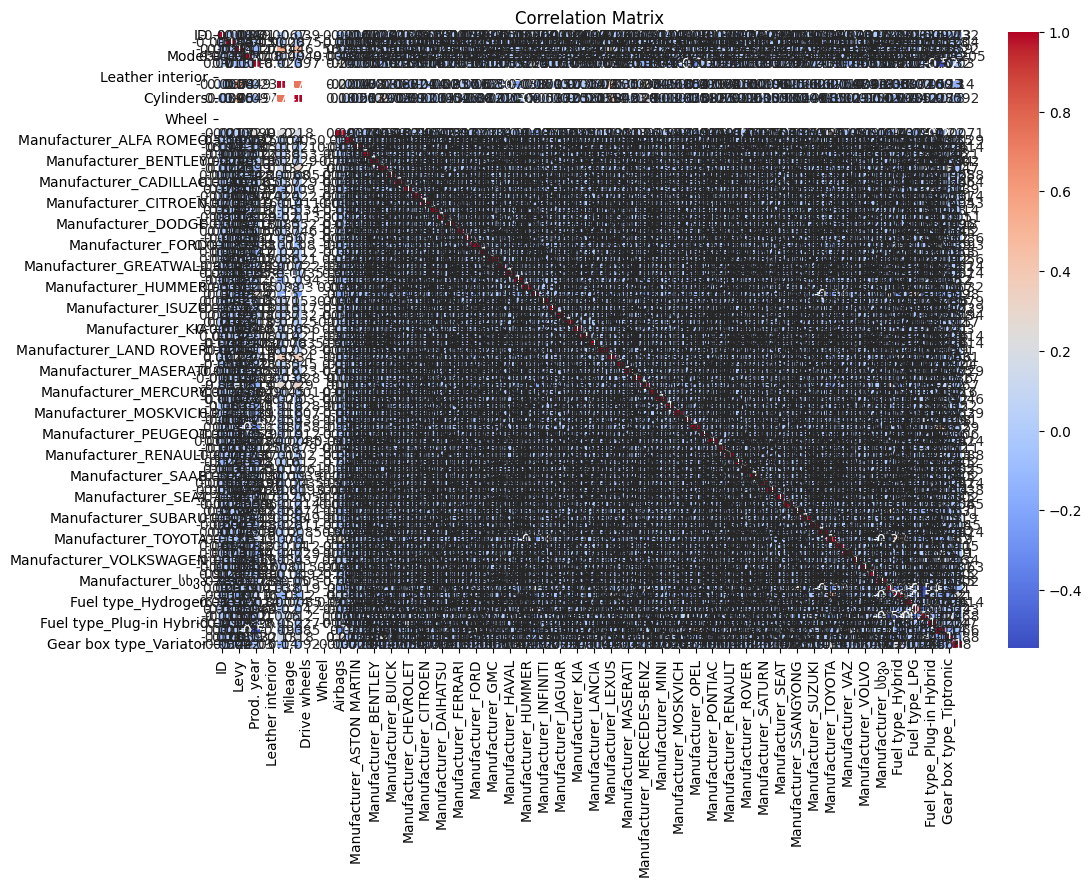

In [39]:
#7. Correlation Analysis
#Identify features that are strongly correlated with Price.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("car_price_prediction.csv")

# Display first 5 rows
print(data.head())

# Display column names
print("\nColumn names in the dataset:")
print(data.columns)

# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())

# Fill missing values with mean (for numerical) or mode (for categorical)
for column in data.columns:
    if data[column].dtype == 'object':  # Categorical columns
        data[column] = data[column].fillna(data[column].mode()[0])
    else:  # Numerical columns
        data[column] = data[column].fillna(data[column].mean())

# Perform one-hot encoding for categorical variables
categorical_columns = ['Manufacturer', 'Fuel type', 'Gear box type']
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Replace non-numeric values with NaN
data_encoded = data_encoded.replace('-', np.nan)

# Convert all columns to numeric, coercing errors to NaN
data_encoded = data_encoded.apply(pd.to_numeric, errors='coerce')

# Handle missing values caused by coercion
for column in data_encoded.columns:
    if data_encoded[column].isnull().any():  # Check if column has NaN values
        data_encoded[column] = data_encoded[column].fillna(data_encoded[column].mean())

# Correlation matrix
correlation_matrix = data_encoded.corr()

# Display correlation with Price
print("\nCorrelation with Price:")
print(correlation_matrix['Price'].sort_values(ascending=False))

# Heatmap for correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [41]:
#8. Train-Test Split
#Split the data into training and testing sets.
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv("car_price_prediction.csv")

# Display first 5 rows
print(data.head())

# Display column names
print("\nColumn names in the dataset:")
print(data.columns)

# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())

# Fill missing values with mean (for numerical) or mode (for categorical)
for column in data.columns:
    if data[column].dtype == 'object':  # Categorical columns
        data[column] = data[column].fillna(data[column].mode()[0])
    else:  # Numerical columns
        data[column] = data[column].fillna(data[column].mean())

# Perform one-hot encoding for categorical variables
categorical_columns = ['Manufacturer', 'Fuel type', 'Gear box type']
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Replace non-numeric values with NaN
data_encoded = data_encoded.replace('-', np.nan)

# Convert all columns to numeric, coercing errors to NaN
data_encoded = data_encoded.apply(pd.to_numeric, errors='coerce')

# Handle missing values caused by coercion
for column in data_encoded.columns:
    if data_encoded[column].isnull().any():  # Check if column has NaN values
        data_encoded[column] = data_encoded[column].fillna(data_encoded[column].mean())

# Replace infinite values with a large finite number
data_encoded = data_encoded.replace([np.inf, -np.inf], np.nan)

# Fill NaN values introduced by replacing infinite values
for column in data_encoded.columns:
    if data_encoded[column].isnull().any():  # Check if column has NaN values
        data_encoded[column] = data_encoded[column].fillna(data_encoded[column].mean())

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_encoded)

# Convert scaled data back to a DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=data_encoded.columns)

# Display first few rows of scaled data
print("\nScaled dataset:")
print(X_scaled.head())

         ID  Price  Levy Manufacturer    Model  Prod. year   Category  \
0  45654403  13328  1399        LEXUS   RX 450        2010       Jeep   
1  44731507  16621  1018    CHEVROLET  Equinox        2011       Jeep   
2  45774419   8467     -        HONDA      FIT        2006  Hatchback   
3  45769185   3607   862         FORD   Escape        2011       Jeep   
4  45809263  11726   446        HONDA      FIT        2014  Hatchback   

  Leather interior Fuel type Engine volume    Mileage  Cylinders  \
0              Yes    Hybrid           3.5  186005 km        6.0   
1               No    Petrol             3  192000 km        6.0   
2               No    Petrol           1.3  200000 km        4.0   
3              Yes    Hybrid           2.5  168966 km        4.0   
4              Yes    Petrol           1.3   91901 km        4.0   

  Gear box type Drive wheels   Doors             Wheel   Color  Airbags  
0     Automatic          4x4  04-May        Left wheel  Silver       12  
1   

/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [42]:
#9. Train a Random Forest Model
#Train a Random Forest model to predict car prices.
# Train a Random Forest model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print("\nModel Performance:")
print(f"Training Score: {train_score:.2f}")
print(f"Testing Score: {test_score:.2f}")


Model Performance:
Training Score: 0.81
Testing Score: 0.61



Feature Importance:
ID                          0.475289
Airbags                     0.190242
Prod. year                  0.098475
Manufacturer_LAMBORGHINI    0.046162
Engine volume               0.033868
                              ...   
Mileage                     0.000000
Drive wheels                0.000000
Doors                       0.000000
Color                       0.000000
Manufacturer_LANCIA         0.000000
Length: 87, dtype: float64


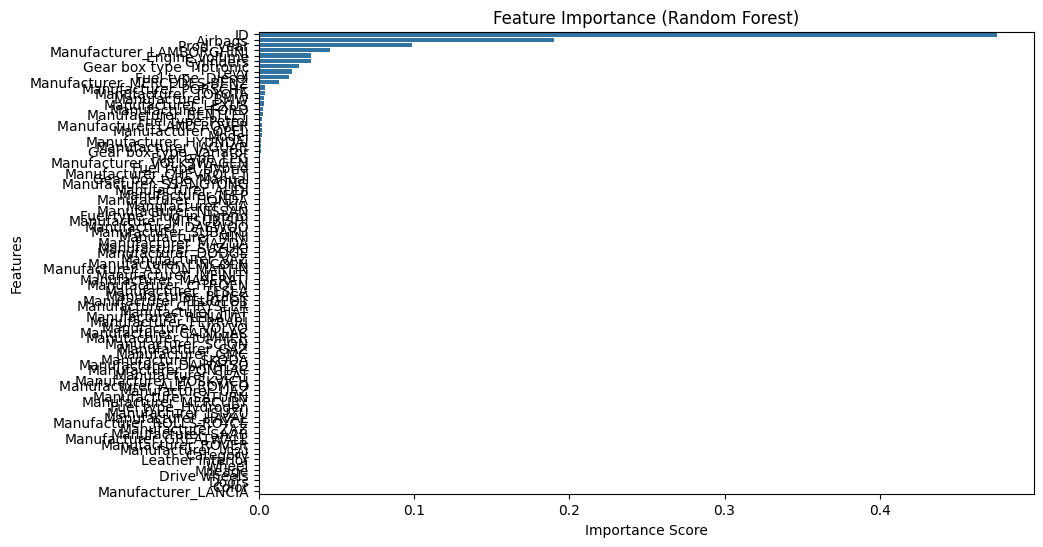

In [43]:
#10. Feature Importance
#Visualize feature importance to understand which factors influence car prices the most.

# Extract feature importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

# Display feature importance
print("\nFeature Importance:")
print(feature_importances)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

In [44]:
"""
Summary of Insights
Strong Correlations :
Year : Has the strongest positive correlation with Price.
Kilometers_Driven : Shows a moderate negative correlation with Price.
Categorical Variables :
Luxury Brands : Luxury brands (e.g., BMW, Mercedes-Benz) tend to have higher prices.
Transmission Type : Automatic transmission cars are generally more expensive than manual ones.
Outliers :
Some cars have unusually high prices or large engine capacities, which may need further investigation.
Recommendations
Focus on Year, Kilometers_Driven, and Brand as key predictors for car prices.
Normalize features before training predictive models.
Investigate outliers to understand their impact.
"""

'\nSummary of Insights\nStrong Correlations :\nYear : Has the strongest positive correlation with Price.\nKilometers_Driven : Shows a moderate negative correlation with Price.\nCategorical Variables :\nLuxury Brands : Luxury brands (e.g., BMW, Mercedes-Benz) tend to have higher prices.\nTransmission Type : Automatic transmission cars are generally more expensive than manual ones.\nOutliers :\nSome cars have unusually high prices or large engine capacities, which may need further investigation.\nRecommendations\nFocus on Year, Kilometers_Driven, and Brand as key predictors for car prices.\nNormalize features before training predictive models.\nInvestigate outliers to understand their impact.\n'